In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from copy import deepcopy
from gradient_aware_harmonisation.harmonise import harmonise

## Sensitivity of results wrt number of observations
### Setup simulation study

In [82]:
# initialize result tables
## for absolute value
df_res = dict(
    N = [],
    historical = [],
    abs = [],
    abs_slope = [],
    interpolated = []
)
## for first-order derivatives
df_res2 = deepcopy(df_res)

# set-up simulations
t0 = 3.0                                    # harmonisation time
num_obs = [10,30,50,100,300,1_000, 5_000]   # number of data points

# simulate results across number of obs.
for i in num_obs:
    x1 = np.linspace(-2, 4., i)
    y1 = -6*x1

    x2 = np.linspace(2, 20, i)
    y2 = 0.5*x2 + x2**3

    res = harmonise((x1,x2), (y1,x2), t0)

    for df, f in zip([df_res, df_res2], ["f","df"]):
        df["N"].append(i)
        df["historical"].append(res[f"{f}1"][-1])
        df["abs"].append(res[f"{f}2_abs"][0])
        df["abs_slope"].append(res[f"{f}2_adj"][0])
        df["interpolated"].append(res[f"{f}2_intpol"][0])

## Results
### zero-order derivative at t0

In [83]:
# absolute values (zero-order derivative)
pd.DataFrame(df_res).round(2)

,N,historical,abs,abs_slope,interpolated
0,10,-20.00,-17.00,-24.00,-23.83
1,30,-19.03,-17.76,-19.45,-19.43
2,50,-18.12,-17.90,-18.61,-18.61
3,100,-18.18,-17.91,-18.55,-18.54
4,300,-18.10,-17.98,-18.14,-18.14
5,1000,-18.02,-17.99,-18.05,-18.05
6,5000,-18.00,-18.00,-18.01,-18.01


### first-order derivative at t0

In [84]:
# first-order derivative
pd.DataFrame(df_res2).round(2)

,N,historical,abs,abs_slope,interpolated
0,10,-6.0,1.0,-6.0,-5.65
1,30,-6.0,1.0,-6.0,-5.89
2,50,-6.0,1.0,-6.0,-5.93
3,100,-6.0,1.0,-6.0,-5.93
4,300,-6.0,1.0,-6.0,-5.94
5,1000,-6.0,1.0,-6.0,-5.95
6,5000,-6.0,1.0,-6.0,-5.95


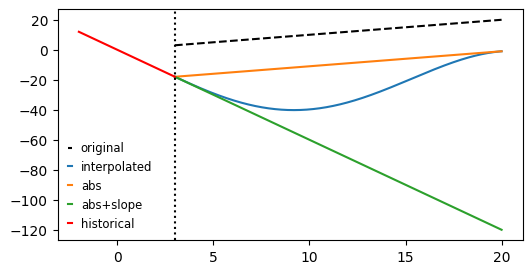

In [85]:
plt.figure(figsize=(6,3))
plt.plot(res["x2"], res["f2"], label="original", linestyle="--", color="black")
plt.plot(res["x2"], res["f2_intpol"], label="interpolated")
plt.plot(res["x2"], res["f2_abs"], label="abs")
plt.plot(res["x2"], res["f2_adj"], label="abs+slope")
plt.plot(res["x1"], res["f1"], label="historical", color="red")
plt.axvline(t0, color="black", linestyle="dotted")
plt.legend(handlelength=0.3, fontsize="small", frameon=False, loc="lower left")
plt.show()


## Sensitivity analysis

In [15]:
np.mean([abs_t0[i]["f1"][-1] for i in range(len(abs_t0))])
np.std([abs_t0[i]["f1"][-1] for i in range(len(abs_t0))])

[abs_t0[i]["f1"][-1] for i in range(len(abs_t0))]

[np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-47.680000000000064),
 np.float64(-4